這篇我們想要仿 WolframAlpha, 畫 "person curve", 你可以點下面的連結看隨機的示範。

[Random Person Curve](https://www.wolframalpha.com/input/?i=random+person+curve)

原理其實很簡單, 就是一個 curve 不過是 (x(t), y(t)) 一堆點連起來。我們用傅利葉級數分別把 x(t), y(t) 學起來就好!

本篇是未經整理, 一邊玩一邊寫出來的, 所以多少有點混亂。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

我們的週期 T 永遠設為 $2\pi$。

In [2]:
T = 2*np.pi

## 傅利葉級數

複習一下、還有各係數如何求出來。

$$ f(t) \sim a_0 + \sum_{n=1}^\infty [a_n\sin(n\omega t) + b_n\sin(n \omega t)]$$

其中

$$\omega = \dfrac{2\pi}{T}$$


#### 假設有 $m$ 個 sample

$$(0, y_0), (1, y_1), (2, y_2), \ldots, (m-1, y_{m-1}), (m, y_0)$$

$$\Delta x = \dfrac{T}{m}$$

#### $a_0$ 計算

$$a_0 = \dfrac{\int_0^T f(t) \, dt}{T}$$

其中的積分的估計

$$\int_0^T f(t) \, dt \simeq \sum_{i=0}^{m-1} f(i\Delta x) \Delta x$$

#### $a_n$ 計算

$$a_n = \dfrac{2\int_0^T f(t) \sin(2n\pi/T t)}{T}$$

$t=2\pi$ 時,

$$a_n = \dfrac{\int_0^T f(t) \sin(n t)\, dt}{\pi}$$

而

$$\int_0^T f(t) \sin(n t)\simeq \sum_{i=0}^{m-1} f(i\Delta x)\sin(in \Delta x) \Delta x$$

#### $b_n$ 計算

$t=2\pi$ 時,

$$b_n = \dfrac{\int_0^T f(t) \cos(n t)\, dt}{\pi}$$

而

$$\int_0^T f(t) \cos(n t)\simeq \sum_{i=0}^{m-1} f(i\Delta x)\cos(in \Delta x) \Delta x$$

In [3]:
n = 5

### 任意 sample, 用傅利葉級數模擬

我們這裡的目標, 是有任意的 sample, 我們都看成週期是 $2\pi$, 並用傅利葉級數學起來。

In [4]:
y = np.random.randn(10)

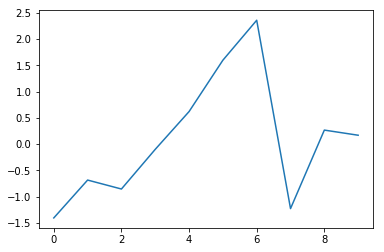

In [5]:
plt.plot(y)

In [6]:
def fourier(arr, n=5):
    m = len(arr)
    Δx = T/m
    a0 = (arr*Δx).sum()/T
    iΔx = np.arange(m)*Δx
    niΔx = np.arange(1,n+1).reshape(n,1)@iΔx.reshape(1,m)
    area_a = (arr*np.sin(niΔx)*Δx).sum(axis=1)
    aseq = area_a/np.pi
    # b_n
    area_b = (arr*np.cos(niΔx)*Δx).sum(axis=1)
    bseq = area_b/np.pi
    return a0, aseq, bseq 

In [7]:
a0, aseq, bseq = fourier(y, n=5)

這裡
    
    fourier(arr, n)
    
是用 arr 這個 array 當我們的 sample, 然後計算傅利葉級數到 $a_n, b_n$。

回傳有第一個係數 $a_0$, 而 $[a_1, a_2, \ldots, a_n]$ 放入 `aseq`, 同理, b 系列係數放入 `bseq`。

In [8]:
def fser(a0, aseq, bseq, tarr):
    n = len(aseq)
    # 1t, 2t, ..., nt
    n_tarr = tarr * np.arange(1,n+1).reshape(n,1)
    sin_arr = np.sin(n_tarr)
    cos_arr = np.cos(n_tarr)
    f_sin = aseq@sin_arr
    f_cos = bseq@cos_arr
    f_values = a0 + f_sin + f_cos
    return f_values

In [9]:
tarr = np.linspace(0,2*np.pi,100)

In [10]:
a0, aseq, bseq = fourier(y, n=5)

In [11]:
fy = fser(a0, aseq, bseq, tarr)

這裡的

    fser(a0, aseq, bseq, tarr)
    
是用前面算出的傅利葉級數係數, 輸入一個 array, 回傳在那些點的傅利葉級數函數值, 回傳也是個 array。

### 畫出模擬的狀況

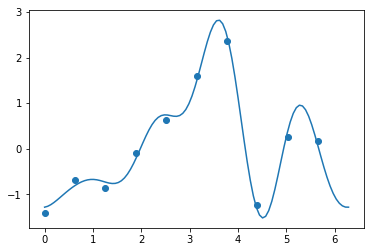

In [12]:
#plt.plot(y)
m = len(y)
plt.scatter(np.arange(0, 2*np.pi, 2*np.pi/m), y)
plt.plot(tarr,fy)

### 課本例子

In [13]:
y = np.array([14, 18.7, 9, 4.1, 6.7, 6, 6.3, 8.4, 4, 2.9])

In [14]:
a0, aseq, bseq = fourier(y, n=5)

In [15]:
tarr = np.linspace(0,2*np.pi,100)

In [16]:
fy = fser(a0, aseq, bseq, tarr)

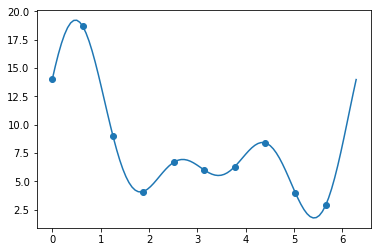

In [17]:
#plt.plot(y)
m = len(y)
plt.scatter(np.arange(0, 2*np.pi, 2*np.pi/m), y)
plt.plot(tarr,fy)

### 鳥身

這裡我們用了一張棕背伯勞的照片, 再用 GeoGebra 5 自己點上點, 並找出座標來, copy 到此。

In [18]:
body = np.array([(-1.18574285845032, 2.13502758791273), (-1.50000000000000, 2.00000000000000), (-1.17797258074480, 1.81644620198659), (-1.17020230303929, 1.56002703770458), (-1.12358063680620, 1.29583759571705), (-1.23236452468341, 0.884012877324725), (-1.20905369156687, 0.549890935987555), (-1.20905369156687, 0.239079827766931), (-1.12358063680620, -0.0950421135702394), (-0.960404804990369, -0.429164054907409), (-0.696215363002839, -0.693353496894940), (-0.354323143960152, -0.809907662477673), (-0.284390644610512, -1.28389460251412), (-0.276620366904996, -1.64132737696784), (-0.167836479027778, -2.18524681635393), (-0.0901337019726222, -2.95450430919997), (0.267299072481095, -3.07882875248822), (0.500000000000002, -3.00000000000000), (0.430474904296922, -2.30180098193666), (0.290609905597642, -1.64909765467335), (0.267299072481095, -1.20619182545897), (0.298380183303157, -0.755515718539065), (0.593650736112751, -0.506866831962566), (0.749056290223063, -0.0950421135702394), (0.702434623989969, 0.417796214993789), (0.655812957756876, 0.806310100269569), (0.547029069879657, 1.23367537407292), (0.500000000000002, 1.50000000000000), (0.259528794775579, 1.83975703510314), (-0.0279714803284974, 2.18164925414583), (-0.369863699371183, 2.35259536366717), (-0.797228973174542, 2.36813591907820)])

In [19]:
bodyx = body[:,0]

In [20]:
bodyy = body[:,1]

In [21]:
xa0, xaseq, xbseq = fourier(bodyx, n=5)

In [22]:
ya0, yaseq, ybseq = fourier(bodyy, n=5)

In [23]:
tarr = np.linspace(0,2*np.pi,1000)

In [24]:
fx = fser(xa0, xaseq, xbseq, tarr)
fy = fser(ya0, yaseq, ybseq, tarr)

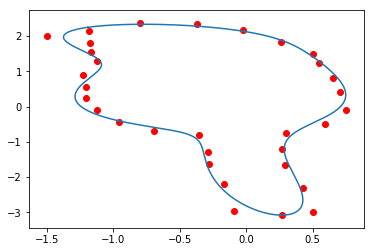

In [25]:
plt.plot(fx, fy)
plt.scatter(bodyx, bodyy, c='r')

In [26]:
def drawbody(n=5):
    xa0, xaseq, xbseq = fourier(bodyx, n=n)
    ya0, yaseq, ybseq = fourier(bodyy, n=n)
    fx = fser(xa0, xaseq, xbseq, tarr)
    fy = fser(ya0, yaseq, ybseq, tarr)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(fx, fy);
    plt.scatter(bodyx, bodyy, c='r');

好像真的可以哦! 我們再來用互動的方式試試!

In [27]:
from ipywidgets import interact

In [28]:
interact(drawbody, n=(5,20))

interactive(children=(IntSlider(value=5, description='n', max=20, min=5), Output()), _dom_classes=('widget-int…

<function __main__.drawbody(n=5)>

### 更完整的

In [29]:
mask = np.array([(-1.19559835429522, 2.07984644856147), (-1.01796036178979, 1.93181478814029), (-0.858086168534914, 1.84891705830443), (-0.692290708863186, 1.76601932846856), (-0.579786646943085, 1.61206640163053), (-0.366621055936577, 1.65351526654846), (-0.242274461182782, 1.77194059488541), (-0.271880793267019, 1.98510618589192), (-0.431754986521899, 2.10353151422886), (-0.603471712610475, 2.21603557614896), (-0.733739573781118, 2.32261837165222), (-0.887692500619151, 2.34038217090276), (-1.04756669387403, 2.26340570748374)])

In [30]:
eye = np.array([(-0.905926679246182, 2.02196277194646), (-0.884244442391249, 1.97859829823660), (-0.840879968681381, 1.95691606138166), (-0.769638333300885, 1.97859829823660), (-0.754151021261647, 2.06222978324848), (-0.797515494971514, 2.10559425695835), (-0.853269818312772, 2.11178918177404), (-0.899731754430487, 2.09320440732696)])

In [31]:
feather = np.array([(-0.988354029705557, 1.27455421587023), (-1.06533049312457, 1.00217596069525), (-1.02980289462349, 0.676506307768643), (-0.781109705115898, 0.380442986926273), (-0.473203851439832, 0.119907264584987), (-0.194904329848002, -0.199841121924772), (0.101158990994369, -0.484061909933448), (0.332088381251418, -0.223526187592161), (0.563017771508468, 0.179119928753461), (0.651836767761180, 0.410049319010510), (0.645915501344332, 0.741640238353965), (0.568939037925316, 0.540317180181153), (0.296560782750333, 0.510710848096916), (0.0597101260764368, 0.587687311515932), (-0.0942428007615962, 0.504789581680069), (-0.342935990269188, 0.439655651094748), (-0.591629179776780, 0.593608577932780), (-0.840322369284372, 0.907435698025692), (-0.929141365537083, 1.08507369053111)])

In [32]:
maskx = mask[:,0]
masky = mask[:,1]

In [33]:
eyex = eye[:,0]
eyey = eye[:,1]

In [34]:
featherx = feather[:,0]
feathery = feather[:,1]

In [35]:
def drawbird(身=5, 眼罩=5, 眼=5, 羽=5):
    bxa0, bxaseq, bxbseq = fourier(bodyx, n=身)
    bya0, byaseq, bybseq = fourier(bodyy, n=身)
    bfx = fser(bxa0, bxaseq, bxbseq, tarr)
    bfy = fser(bya0, byaseq, bybseq, tarr)
    # mask
    mxa0, mxaseq, mxbseq = fourier(maskx, n=眼罩)
    mya0, myaseq, mybseq = fourier(masky, n=眼罩)
    mfx = fser(mxa0, mxaseq, mxbseq, tarr)
    mfy = fser(mya0, myaseq, mybseq, tarr)
    # eye
    exa0, exaseq, exbseq = fourier(eyex, n=眼)
    eya0, eyaseq, eybseq = fourier(eyey, n=眼)
    efx = fser(exa0, exaseq, exbseq, tarr)
    efy = fser(eya0, eyaseq, eybseq, tarr)
    # feather
    fxa0, fxaseq, fxbseq = fourier(featherx, n=羽)
    fya0, fyaseq, fybseq = fourier(feathery, n=羽)
    ffx = fser(fxa0, fxaseq, fxbseq, tarr)
    ffy = fser(fya0, fyaseq, fybseq, tarr)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.plot(bfx, bfy, c='b');
    plt.plot(mfx, mfy, c='b');
    plt.plot(efx, efy, c='b');
    plt.plot(ffx, ffy, c='b')

In [36]:
interact(drawbird, 身=(5,20), 眼罩=(5,20), 眼=(5,20), 羽=(5,20))

interactive(children=(IntSlider(value=5, description='身', max=20, min=5), IntSlider(value=5, description='眼罩',…

<function __main__.drawbird(身=5, 眼罩=5, 眼=5, 羽=5)>